In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
from mpl_toolkits.mplot3d import Axes3D
_cmap = plt.cm.jet

import model_opt
import algo_GD
import helper
import noise

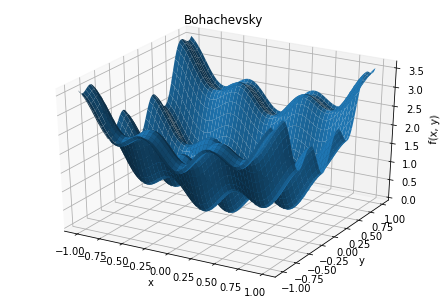

In [15]:


f = model_opt.Bohachevsky()
x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(x, y)
Z = f.f_opt([X,Y])
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title(f.name)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

ax.plot_surface(X, Y, Z)
plt.show()

In [3]:
w_init = np.array([5,5])

var = 50 # iqr 70~80
batchsize = 100
_t_max = 10000
noise_data = noise.Gauss(mean=0, sigma=var, dim=2, n=batchsize * _t_max).generate()

algo = algo_GD.SGD(w_init=w_init, t_max=_t_max, a=0.1)
for i in algo:
    f = model_opt.Bohachevsky(noise_value=noise_data[algo.t-1])
    algo.update(model=f)

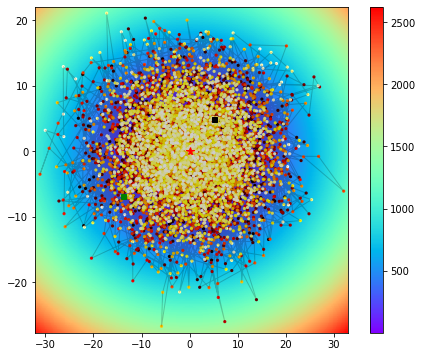

In [4]:
# シンプルなSGD

w_star = f.w_star
w_store_SGD = np.array(algo.wstore)
grid_x_min = min(w_store_SGD.T[0].min(),w_star[0])-1
grid_x_max = max(w_store_SGD.T[0].max(),w_star[0])+1
grid_y_min = min(w_store_SGD.T[1].min(),w_star[1])-1
grid_y_max = max(w_store_SGD.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store_SGD.T[0],w_store_SGD.T[1],c = "k",alpha=0.2,linewidth = 1)
c = np.linspace(0, _t_max, len(w_store_SGD))
axes.scatter(w_store_SGD.T[0],w_store_SGD.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)

# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store_SGD[0], 'ks', markersize=5,label="start")
axes.plot(*w_store_SGD[-1], 'gs', markersize=5,label="finish")
axes.plot(*w_star, 'r*', markersize=8,label="true value")

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [5]:
var = 50 # iqr 70~80
batchsize = 100
t = _t_max / batchsize

algo = algo_GD.MinibatchSGD(w_init=w_init, t_max=t, a=0.1,batchsize=batchsize)
for i in algo:
    f = model_opt.Bohachevsky(noise_value=noise_data[algo.t:algo.t+100])
    algo.update(model=f)

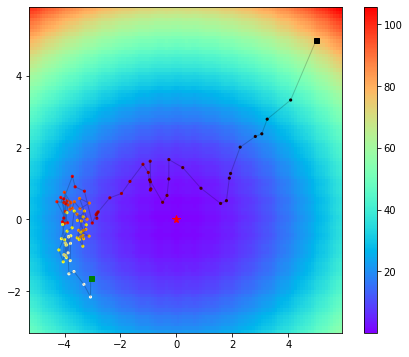

In [6]:
w_star = f.w_star
w_store_minibatch = np.array(algo.wstore)
grid_x_min = min(w_store_minibatch.T[0].min(),w_star[0])-1
grid_x_max = max(w_store_minibatch.T[0].max(),w_star[0])+1
grid_y_min = min(w_store_minibatch.T[1].min(),w_star[1])-1
grid_y_max = max(w_store_minibatch.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store_minibatch.T[0],w_store_minibatch.T[1],c = "k",alpha=0.2,linewidth = 1)
c = np.linspace(0, _t_max, len(w_store_minibatch))
axes.scatter(w_store_minibatch.T[0],w_store_minibatch.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)

# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store_minibatch[0], 'ks', markersize=5,label="start")
axes.plot(*w_store_minibatch[-1], 'gs', markersize=5,label="finish")
axes.plot(*w_star, 'r*', markersize=8,label="true value")

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

Text(0.5, 1.0, 'SGD step T = 1~10000')

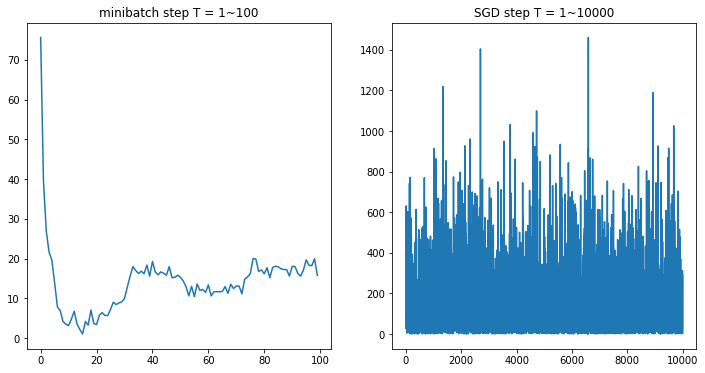

In [7]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].plot(f.f_opt(w_store_minibatch.T))
axes[0].set_title('minibatch step T = 1~100')

axes[1].plot(f.f_opt(w_store_SGD.T))
axes[1].set_title('SGD step T = 1~10000')



In [8]:
tail = 20
np.mean(w_store_minibatch[-tail:],axis=0)

array([-3.78345309, -0.96572299])

In [9]:
last_w_SGD = w_store_SGD[-1]
last_w_minibatch = w_store_minibatch[-1]
tail_avaraging_w = np.mean(w_store_minibatch[-10:],axis=0)

In [10]:
# 100回くらいやって平均と分散求めたい

print("SGD function value {}".format(f.f_opt(last_w_SGD)))
print("minibatch function value {}".format(f.f_opt(last_w_minibatch)))
print("minibatch function value {}".format(f.f_opt(tail_avaraging_w)))

SGD function value 287.1627339904637
minibatch function value 15.81001276161938
minibatch function value 17.794637613407694


In [ ]:
var = 50 # iqr 70~80
batchsize = 100
t = _t_max / batchsize

algo = algo_GD.MinibatchSGD(w_init=w_init, t_max=t, a=0.1,batchsize=batchsize)
for i in algo:
    f = model_opt.Bohachevsky(noise_value=noise_data[algo.t:algo.t+100])
    algo.update(model=f)